# Taller 4
Alumno: 
- José Nicolas Castillo Rojas
- Agustin Brito
- Pablo Silva

In [317]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from numpy.matlib import repmat

## Parte 1

### Parte 1.1 
Utilice  una  imagen  descargada  de  internet.  De  dicha  imagen  sólo  utilice  una  sección  de 
256x256  píxeles.  Genere  distintas  versiones  de  la  imagen  original  empleando  distintos 
modelos  de  ruido.  Los  ruidos  que  debe  emplear  corresponden  a:  (1)  ruido  gaussiano,  (2) 
uniforme, (3) impulsional-sal e (4) impulsional-pimienta. Usted debe definir el nivel de ruido 
para cada imagen. Se deja a elección definir el nivel de ruido en cada modelo. En total usted 
debe generar cuatro imágenes con los ruidos indicados previamente.

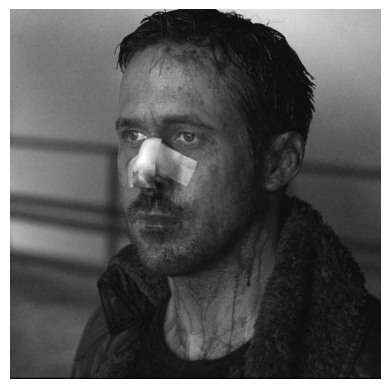

(733, 735)


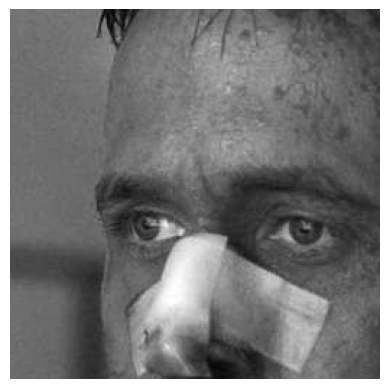

(256, 256)


In [318]:
img =cv2.imread('Ryan Gosling.jpg', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap="gray"),plt.axis('off')
plt.show()
print(gray.shape)
# Se Ajusta el tamaño de la imagen a 256x256
alto, width = 256, 256 # tamaño Requerido
x, y =150,100 # desplazamientos de los ejes x e y

gray= gray[y:y +alto, x:x + width]

plt.imshow(gray,cmap="gray"),plt.axis('off')
plt.show()
print(gray.shape)

#### 1)  ruido  gaussiano 

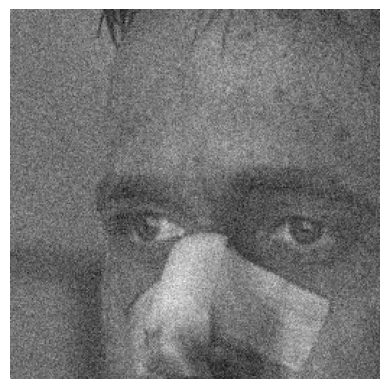

(<matplotlib.image.AxesImage at 0x28f0b44a8a0>,
 (-0.5, 255.5, 255.5, -0.5),
 None)

In [319]:
copia= np.copy(gray)/255
# Obtener las dimensiones de la imagen
fil, col = copia.shape

# Generar ruido gaussiano con media 0 y una desviación estándar pequeña
ruido_gauss = np.random.normal(loc=0, size=(fil, col)) * 0.05

img_ruido_gaussiano = cv2.add(copia, ruido_gauss )

plt.imshow(img_ruido_gaussiano, cmap='gray'),plt.axis('off'),plt.show()


#### 2) uniforme

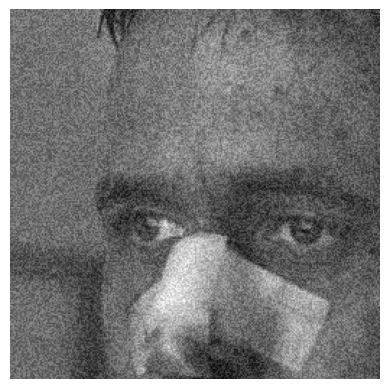

(<matplotlib.image.AxesImage at 0x28f27924650>,
 (-0.5, 255.5, 255.5, -0.5),
 None)

In [320]:
copia= np.copy(gray)
a=0
b=40
ruido = np.random.uniform(a, b, copia.shape).astype('uint8')
img_ruido_uniforme =noisy_image = cv2.add(copia,ruido)
plt.imshow(img_ruido_uniforme, cmap='gray'),plt.axis('off'),plt.show()

#### 3) impulsional-sal 

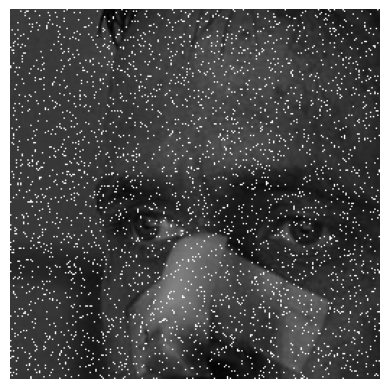

(<matplotlib.image.AxesImage at 0x28f27a24650>,
 (-0.5, 255.5, 255.5, -0.5),
 None)

In [321]:
img_ruido_sal= np.copy(gray)
fil, col = img_ruido_sal.shape
ruido = np.random.random((fil,col)) <0.05
img_ruido_sal[ruido] = 255
plt.imshow(img_ruido_sal, cmap='gray'),plt.axis('off'),plt.show()

#### 4) impulsional-pimienta.


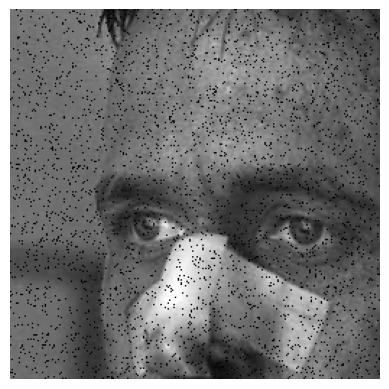

(<matplotlib.image.AxesImage at 0x28f0ba90650>,
 (-0.5, 255.5, 255.5, -0.5),
 None)

In [322]:
img_ruido_pepper= np.copy(gray)
fil, col = img_ruido_sal.shape
ruido = np.random.random((fil,col)) <0.05
img_ruido_pepper[ruido] = 0
plt.imshow(img_ruido_pepper, cmap='gray'),plt.axis('off'),plt.show()

### Parte 1.2
Para cada imagen ruidosa determine el filtro que mejor reduzca ruido. Utilice sólo un filtro 
por cada imagen. No obstante, el filtro que usted seleccione debe pertenecer a una de las 
tres familias de filtros en el espacio. Esto significa que al menos debe haber un filtro de orden 
estadístico,  un  filtro  adaptivo,  y  un  filtro  lineal  implementado  en  su  tarea.  Explique  las 
razones por las cuales el filtro que usted seleccionó es mejor que otros filtros.

In [323]:
import scipy.ndimage as ndi
import statistics as sts

#### Filtros de orden estadísticos

In [324]:
def filtro_promedio_acotado(subimage, acut):
    S= np.sort(subimage.flatten())
    B= S[acut:-acut]
    val=np.sum(B)/len(B)
    return val
def filtro_pto_medio(subimagen):
    return 1/2*(np.max(subimagen)+min(subimagen))


def filtro_promedio(subimagen):
    return np.mean(subimagen)

def filtro_mediana(subimagen):
    return np.median(subimagen)

def filtro_moda(subimagen):
    return np.mode(subimagen)

def filtro_max(subimagen):
    return np.max(subimagen)

def filtro_min(subimagen):
    return np.min(subimagen)


#### Filtros Adaptivos

In [325]:
def filtro_ruido_local(subimagen):
    var_N = 0.0008   #varianza estimada del ruido 
    B = subimagen.flatten()
    n = len(subimagen)
    var_L = np.var(B) #varianza en la mascara
    
    mu    = np.mean(B)
    g     = B[np.uint8(n/2)]     
    f     =  g - (var_N/var_L)*(g-mu)
    return f   

#### 1)  Reduccion de ruido gaussiano  -

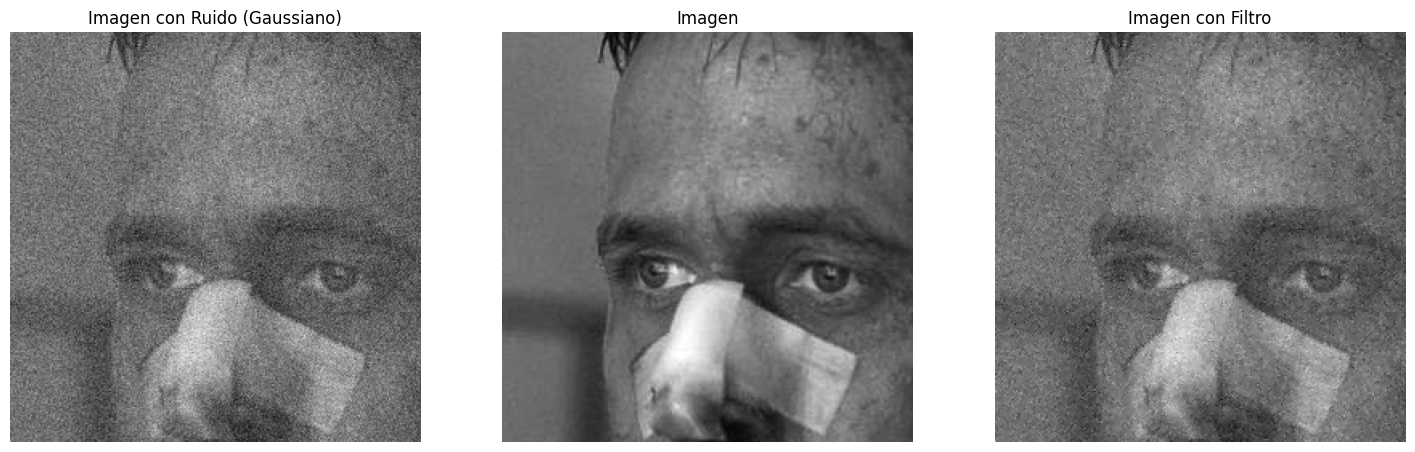

In [326]:
filtro= ndi.generic_filter(img_ruido_gaussiano,filtro_ruido_local, [3,3])

plt.figure(figsize=(18,10))
plt.subplot(1,3,1),plt.imshow(img_ruido_gaussiano, cmap="gray"),plt.title("Imagen con Ruido (Gaussiano)"),plt.axis('off')
plt.subplot(1,3,2),plt.imshow(gray, cmap="gray"),plt.title("Imagen"),plt.axis('off')
plt.subplot(1,3,3),plt.imshow(filtro, cmap="gray"),plt.title("Imagen con Filtro"),plt.axis('off')

plt.show()


#### 2)  Reduccion de ruido Uniforme  

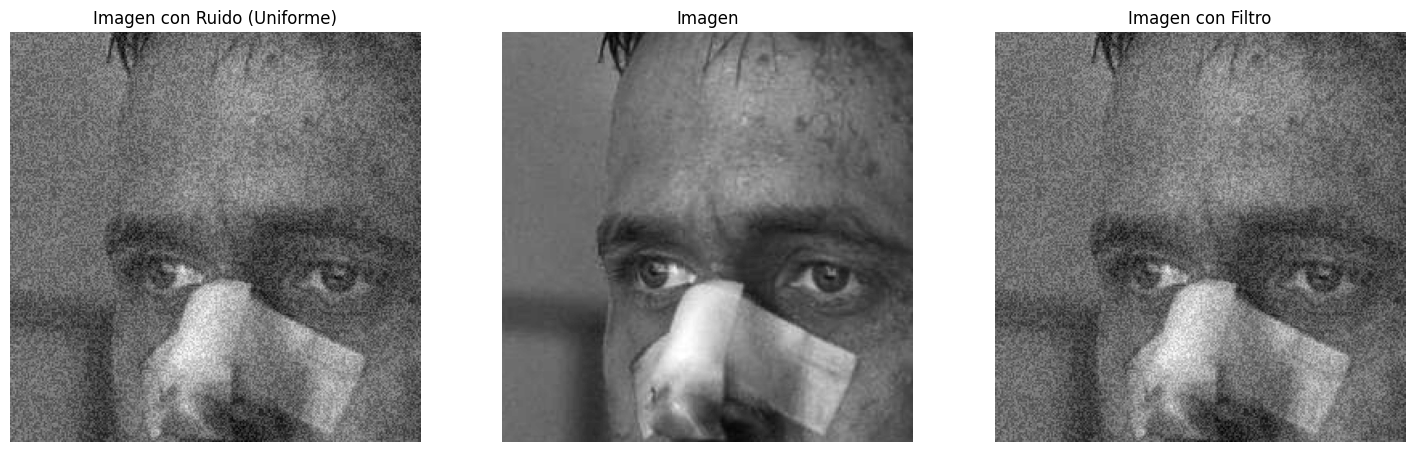

In [327]:
filtro= ndi.generic_filter(img_ruido_uniforme,filtro_ruido_local, [3,3])

plt.figure(figsize=(18,10))
plt.subplot(1,3,1),plt.imshow(img_ruido_uniforme, cmap="gray"),plt.title("Imagen con Ruido (Uniforme)"),plt.axis('off')
plt.subplot(1,3,2),plt.imshow(gray, cmap="gray"),plt.title("Imagen"),plt.axis('off')
plt.subplot(1,3,3),plt.imshow(filtro, cmap="gray"),plt.title("Imagen con Filtro"),plt.axis('off')

plt.show()

#### 3)  Reduccion de ruido Sal  - Filtros de orden estadísticos (min)

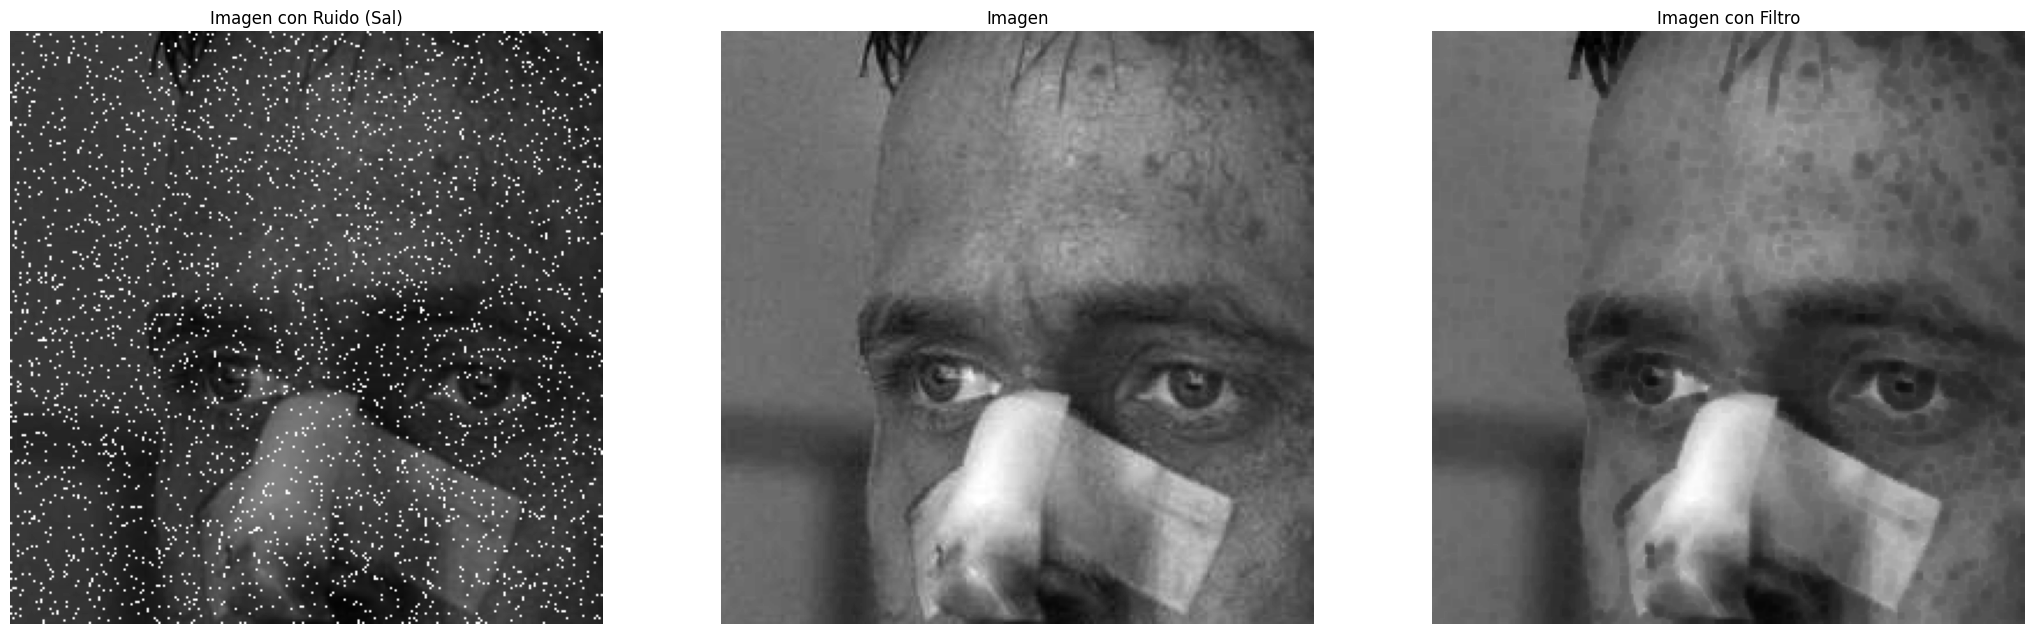

In [331]:
filtro= ndi.generic_filter(img_ruido_sal,filtro_min, [3,3])

plt.figure(figsize=(26,10))
plt.subplot(1,3,1),plt.imshow(img_ruido_sal, cmap="gray"),plt.title("Imagen con Ruido (Sal)"),plt.axis('off')
plt.subplot(1,3,2),plt.imshow(gray, cmap="gray"),plt.title("Imagen"),plt.axis('off')
plt.subplot(1,3,3),plt.imshow(filtro, cmap="gray"),plt.title("Imagen con Filtro"),plt.axis('off')

plt.show()


#### 4)  Reduccion de ruido Pimienta - Filtros de orden estadísticos (max)

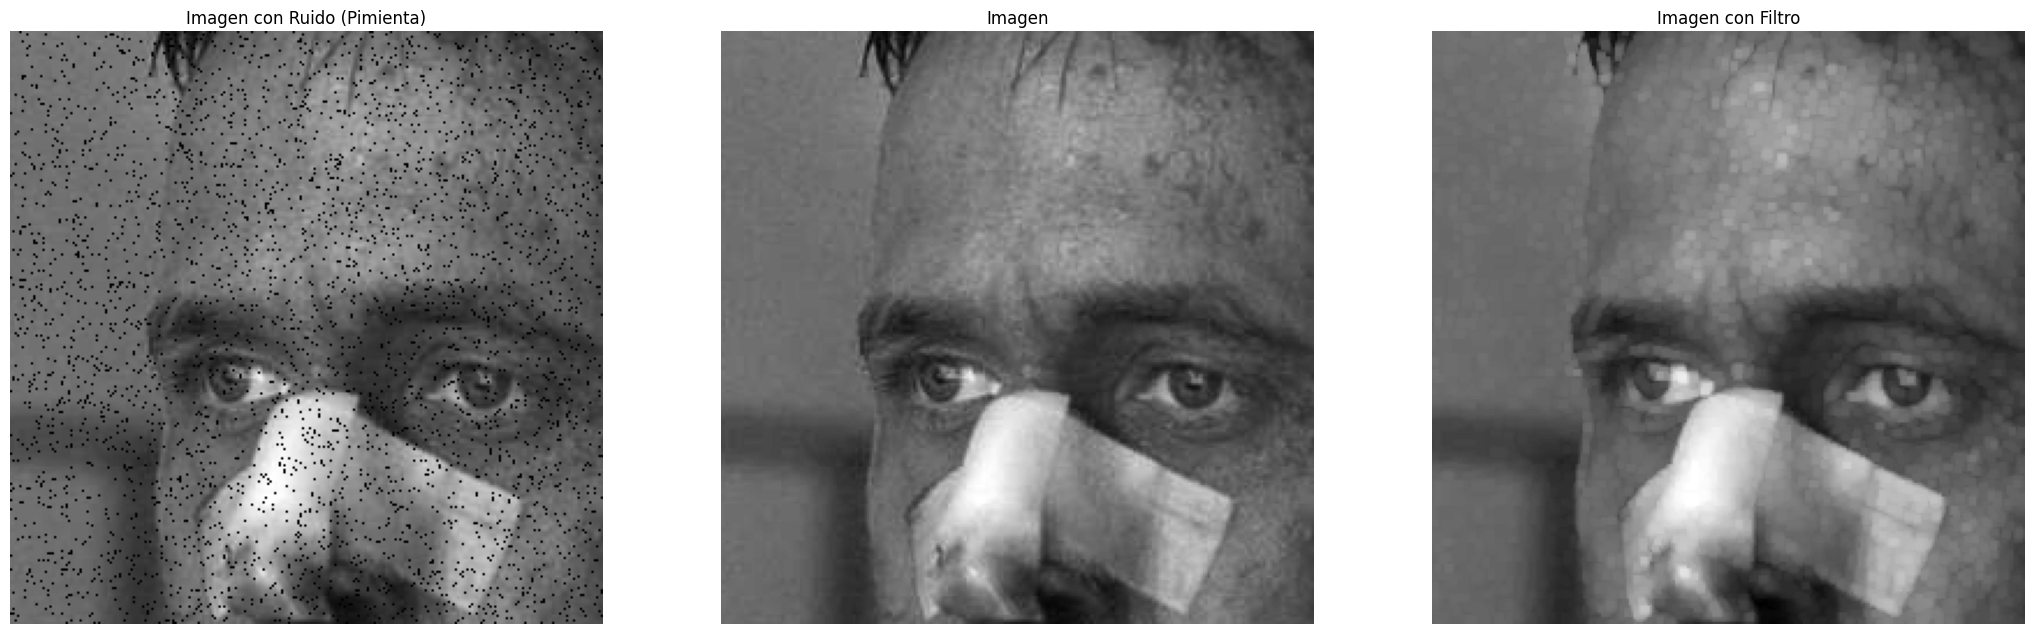

In [330]:
filtro= ndi.generic_filter(img_ruido_pepper,filtro_max, [3,3])

plt.figure(figsize=(26,10))
plt.subplot(1,3,1),plt.imshow(img_ruido_pepper, cmap="gray"),plt.title("Imagen con Ruido (Pimienta)"),plt.axis('off')
plt.subplot(1,3,2),plt.imshow(gray, cmap="gray"),plt.title("Imagen"),plt.axis('off')
plt.subplot(1,3,3),plt.imshow(filtro, cmap="gray"),plt.title("Imagen con Filtro"),plt.axis('off')
plt.show()
